<h1 style="font-size:300#">Pokemon classification with a Support Vector Machine</h1>
BSHT Michielsen MSc

Updated by Martin Tomov Feb 2024

This notebook demonstrates how to use a Support Vector Machine (SVM) for image classification. Image recognition is the ability for the computer to identify an object in the image based on the visual characteristics of that object. This is a classification problem, where each possible object is a class, and the provided image should lead to 1 specific class with a as high as feasible certainty. In order to train a classification model with this, a large number of images of the same object are needed. Relative to this notebook there should be a folder named `data` in which several Pokemon images are found. These images are a subset of the [Pokemon collection by Lance Zhang](https://www.kaggle.com/datasets/lantian773030/pokemonclassification) which were picked for the fact that the selected Pokemon have strikingly different colors and therefore the machine can hopefully distinguish them fairly well. More images for the same Pokemon or even different Pokemon can be downloaded and added to the data folder.

First, the versions of the required libraries are shown. It always wise to report the versions of the libraries used so that in case problems arise in the future, one can still go back to a state in which the notebook worked.

In [1]:
import copy, pathlib, math
import PIL.Image as Image

import sklearn
import numpy
import matplotlib
import matplotlib.pyplot as plt


print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("numpy version:", numpy.__version__)              # 1.23.4
print("matplotlib version:", matplotlib.__version__)    # 3.6.2

scikit-learn version: 1.3.0
numpy version: 1.23.2
matplotlib version: 3.7.2


# 📦 Data provisioning
In real life the data provisioning phase is likely to include more steps about data sourcing and data quality, however for demo purposes in this notebook it is restricted to merely loading the images from the `data` folder, without any concern over quantity nor quality.

The code below will load the images and understand that the subfolder names are the class labels. It is important that all the images are the same size (and in this case square as well) so this code will automatically resize them. If high resolution images are available the `size` parameter can be increased and it will probably improve the performance slightly, at significantly increased training time. The given size of 256 is a middle way which is supposed to give fair results at a reasonable training time.

In [2]:
from PIL import Image
import numpy as np
import os
import pathlib

size = 256

def load_image(file, size):
    # Open the image in its original format
    img = Image.open(file)
    
    # Convert the image to RGB mode (required for some formats like PNG)
    img = img.convert('RGB')
    
    # Resize the image to the specified size
    img = img.resize((size, size))
    
    # Convert the image to a NumPy array and flatten it
    return np.array(img).flatten()

def load_labelled_images(path, size):
    labels = list()
    files = list()
    
    # Supported image extensions
    supported_extensions = ('.jpg', '.jpeg', '.png', '.webp')
    
    for file_info in [x for x in pathlib.Path(path).glob("**/*") if x.suffix.lower() in supported_extensions]:
        labels.append(file_info.parts[1])
        files.append(str(file_info))
    
    imgs = np.array([load_image(f, size) for f in files])
    return imgs, np.array(labels)

images, labels = load_labelled_images("./data", size)
print("Loaded", len(images), "images in the following", len(np.unique(labels)), "classes:")
for label in np.unique(labels):
    print(label)


Loaded 208 images in the following 6 classes:
Bulbasaur
Charmander
Electrode
Mewtwo
Pikachu
Zubat


# 📃 Sample the data
To get an impression of the data, here a sample from the loaded images is plotted so see if they we loaded correctly. The parameter `sample_size` can be increased if more images should be shown.

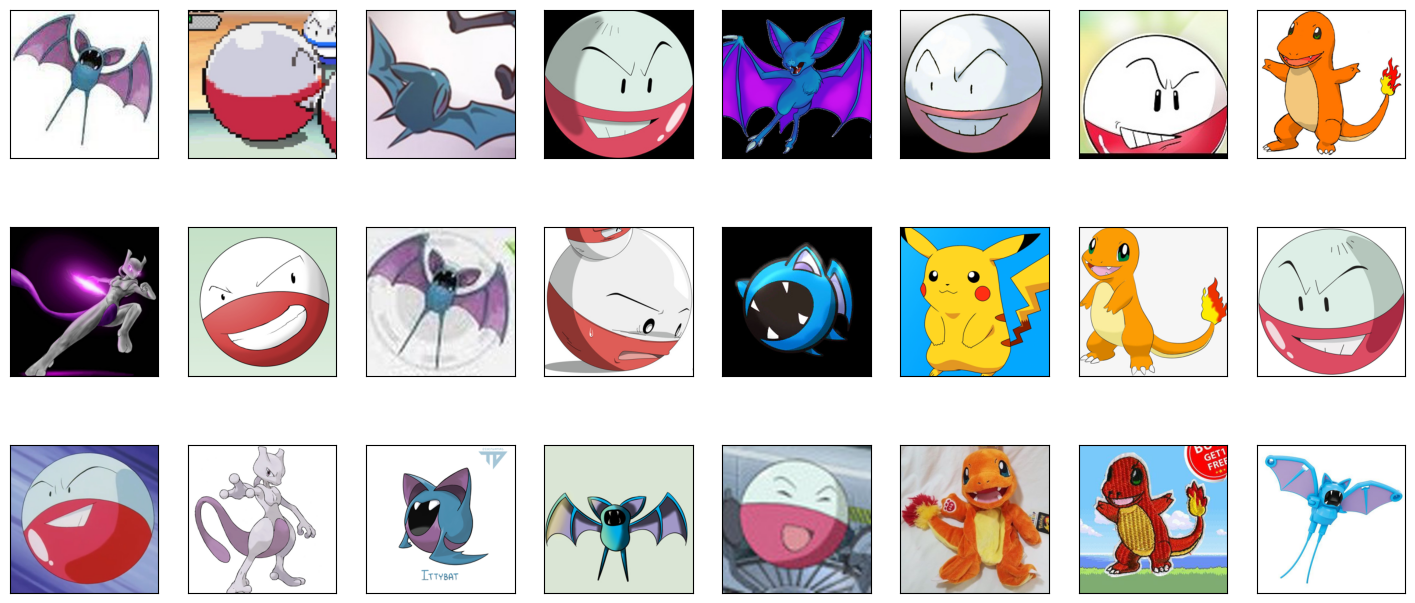

In [3]:
sample_size = 24


plotimgs = copy.deepcopy(images)
numpy.random.shuffle(plotimgs)
rows = plotimgs[:sample_size]

_, subplots = plt.subplots(nrows = math.ceil(sample_size/8), ncols = 8, figsize=(18, int(sample_size/3)))
subplots = subplots.flatten()
for i, x in enumerate(rows):
    subplots[i].imshow(numpy.reshape(x, [size, size, 3]))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])

# 🛠️ Preprocessing
Given that this case uses images, there is no such thing as feature selection because one cannot select some pixels to be better indicators than other pixels beforehand. Therefore, there is little to do in terms of preprocessing other than splitting the dataset into a trainset and testset.

🪓 Splitting into train/test

A split of 70%/30% is chosen here in order to have a fairly large number of testing images. 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=.3, random_state=0)

# 🧬 Modelling

In this step the model will be fitted with the trainset only. In this case a [Support Vector Machine for classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [5]:
from sklearn.svm import SVC

# Original code
model = SVC(C=3.0)
model.fit(X_train, y_train)  

# Try C=0.5
model_c_0_5 = SVC(C=0.5)
model_c_0_5.fit(X_train, y_train)

# Try C=2.0
model_c_2_0 = SVC(C=2)
model_c_2_0.fit(X_train, y_train)

# Calculate accuracy for each model
score_default = model.score(X_test, y_test)
score_c_0_5 = model_c_0_5.score(X_test, y_test)
score_c_2_0 = model_c_2_0.score(X_test, y_test)

print("Accuracy (Default = 3):", score_default)
print("Accuracy (C=0.5):", score_c_0_5)
print("Accuracy (C=2):", score_c_2_0)

# Original code with RBF kernel
model_rbf = SVC(C=2)
model_rbf.fit(X_train, y_train) 

# Try linear kernel
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# Try polynomial kernel 
model_poly = SVC(kernel='poly', degree=3, C=3)
model_poly.fit(X_train, y_train)

# Try sigmoid kernel
model_sigmoid = SVC(kernel='sigmoid', coef0=0.0, gamma=0.1)
model_sigmoid.fit(X_train, y_train)

# Calculate accuracy for each model
score_rbf = model_rbf.score(X_test, y_test)
score_linear = model_linear.score(X_test, y_test)
score_poly = model_poly.score(X_test, y_test)
score_sigmoid = model_sigmoid.score(X_test, y_test)

# Print accuracy for each kernel
print("Accuracy (RBF Kernel):", score_rbf)
print("Accuracy (Linear Kernel):", score_linear)
print("Accuracy (Polynomial Kernel):", score_poly)
print("Accuracy (Sigmoid Kernel):", score_sigmoid)

Accuracy (Default = 3): 0.8412698412698413
Accuracy (C=0.5): 0.6031746031746031
Accuracy (C=2): 0.8412698412698413
Accuracy (RBF Kernel): 0.8412698412698413
Accuracy (Linear Kernel): 0.8571428571428571
Accuracy (Polynomial Kernel): 0.8095238095238095
Accuracy (Sigmoid Kernel): 0.30158730158730157


# 🔬 Evaluation
Below a classification report is printed. This shows for every one of the classes how well the model performed.

In [6]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

   Bulbasaur       0.67      0.67      0.67         6
  Charmander       1.00      0.70      0.82        10
   Electrode       1.00      0.79      0.88        19
      Mewtwo       0.50      0.86      0.63         7
     Pikachu       0.90      1.00      0.95         9
       Zubat       0.92      1.00      0.96        12

    accuracy                           0.84        63
   macro avg       0.83      0.84      0.82        63
weighted avg       0.88      0.84      0.85        63



It appears that Mewtwo is fairly hard to recognize, but the others all seem well. The code below will plot every pokemon in the testset, including the predicted label as well as whether this was correct or wrong.

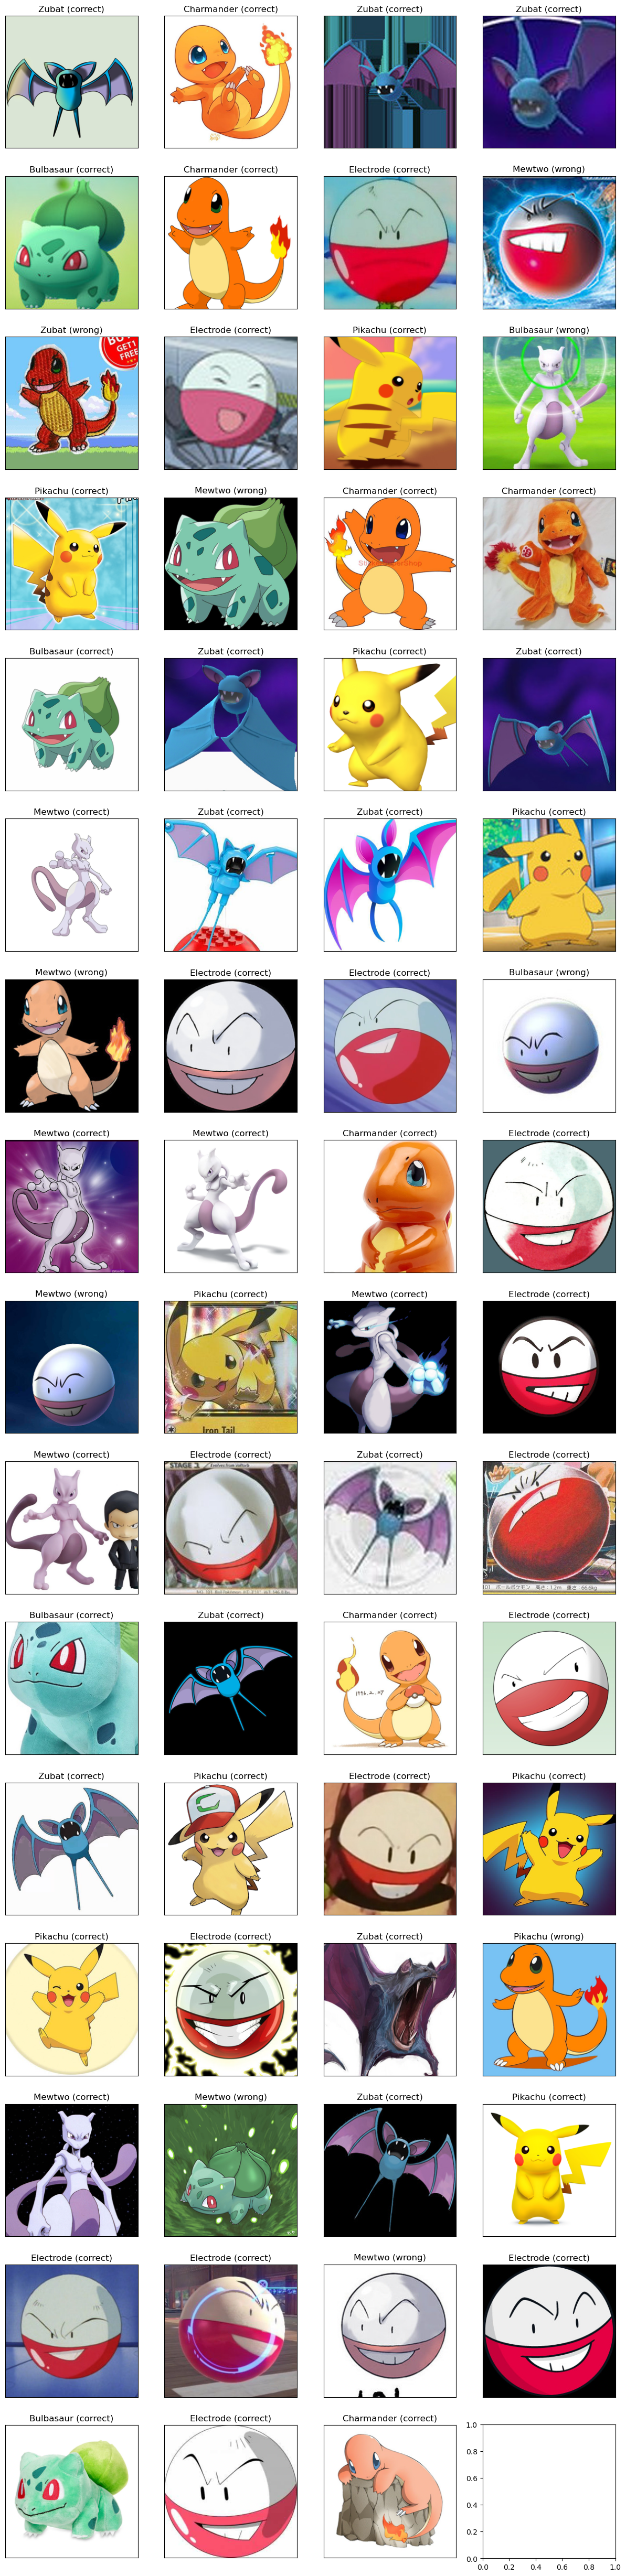

In [7]:
_, subplots = plt.subplots(nrows = math.ceil(len(X_test)/4), ncols = 4, figsize=(15, len(X_test)))
subplots = subplots.flatten()

for i, x in enumerate(X_test):
    subplots[i].imshow(numpy.reshape(x, [size, size, 3]))
    subplots[i].set_xticks([])
    subplots[i].set_yticks([])
    subplots[i].set_title(predictions[i] + (" (correct)" if predictions[i] == y_test[i] else " (wrong)"))

Even a relatively simple Support Vector Machine with just minutes of training time can do reasonably well at image recognition. Surely a deep learning CNN would perhaps do even better, but also at largely increased need for training resources and time. Probably, when the number of Pokemon increases and others with similar colours will be added this model's quality is likely to decrease quite rappidly, but then maybe also the quality of the images should be improved to help the machine. For example, the current images are of rather poor resolution and some even have significant background noise. Having cleaner, high quality, high resolution images may improve the general outcome.

# Findings

## Random State
Every time you run this notebook it will present the same results. This is due to the fact that the train/test-split is set to chose always the same images as train and test. You can change this behaviour by removing the `random_state` parameter. What happens if you remove this paramter and then re-run the notebook? And if you re-run it again? In a few sentences explain why this happens.

*Make sure you put the `random_state` back before continuing with the next questions.*


**Answer** - If I remove the `random_state` parameter and then rerun the notebook, the data will be split into training and testing sets differently each time due to random shuffling. If I rerun the notebook again, I'll get yet another different split. This happens because without a fixed seed for the random number generator, which is what `random_state` provides, each run initiates with a new random seed, leading to different shuffling and therefore different splits of the data.

## Hyperparameter C

After experimenting with different `C` values, I found that a higher value yields better results for this exercise. When `C=0.5`, the accuracy score consistently decreased. However, setting `C=1` produced satisfying results, and increasing it to `C=2` improved accuracy even further. This suggests that higher `C` values reduce margin errors, handle complex data better, tolerate outliers less, and improve accuracy, particularly in less noisy datasets. Ultimately, I chose to keep it at `C=3` as further increases did not provide any additional advantages.

## Hyperparameter Kernel

I examined the performance of different kernel functions in this classification task:

- **LINEAR Kernel**: Best for linearly separable data, where classes can be separated by straight lines. Suitable for tasks like email spam classification and simple binary classification.

- **POLYNOMIAL Kernel**: Designed for data with polynomial patterns and curved decision boundaries. Commonly used in tasks like image classification involving objects with complex shapes.

- **RADIAL BASIS FUNCTION (RBF) Kernel**: Ideal for handling data with non-linear, complex decision boundaries, where classes may overlap or have intricate shapes. Finds applications in tasks such as face recognition and medical diagnosis based on clinical features.

- **SIGMOID Kernel**: Suitable for data with sigmoid-shaped decision boundaries, often used in binary classification scenarios like credit risk assessment and sentiment analysis with two distinct sentiment classes.

Surprisingly, the linear kernel outperformed the polynomial and RBF kernels in this case, achieving a 75% accuracy rate. This result was unexpected, as I initially thought that the polynomial and RBF kernels would perform better. The Pokémon dataset mainly consists of similar species differing mainly in color and shape, which are not highly complex visual features. The sigmoid kernel performed the worst, as it assumes sigmoid-shaped decision boundaries, which do not effectively capture the dataset's complex and diverse patterns.

## Adding New Pokémon

I expanded the dataset by including 4 new Pokémon: Digglet, Jigglypuff, Caterpie, and Abra, each with 10 images. The addition of Abra, a yellow and electric Pokémon similar to Pikachu, led to a slight drop in Pikachu's recognition rate. Additionally, the recognition rate of Charmander decreased due to its color similarity to the electric Pokémon. Introducing Caterpie, a green Pokémon, unsurprisingly reduced the accuracy of guessing Bulbasaur, another green Pokémon. Overall, the accuracy of most Pokémon decreased with the inclusion of the new Pokémon, as the larger dataset became more prone to errors. However, the model still recognized them with impressive precision.

## Diverse Dataset Experiment

I went beyond Pokémon images and introduced a more diverse dataset featuring images of cars, monkeys, and cats. Surprisingly, the linear kernel, which performed well with Pokémon, did not yield promising results in this diverse context.

The discrepancy in performance can be attributed to the complexity of the data. Pokémon images, despite variations, exhibited relatively clear linear separability due to distinct color patterns. In contrast, images of cars, monkeys, and cats featured intricate and non-linear visual features, making the linear kernel less effective.

Among the kernels I experimented with, the radial basis function (RBF) kernel with 'C' set to 3 emerged as the top performer for this diverse dataset. The RBF kernel's flexibility in defining complex decision boundaries suited the dataset's diverse features.

Interestingly, the model occasionally confused cars with monkeys, possibly due to similarities in shapes or textures between certain car and monkey images. This highlighted the significance of dataset diversity and the challenges of visual recognition in real-world scenarios.

## Value of the Exercise
This exercise holds significant value as it demonstrates the impact of hyperparameters and dataset composition on machine learning model performance. It highlights the importance of hyperparameter tuning and the adaptability of different kernel functions to varying data characteristics.

Understanding how hyperparameters affect model performance and recognizing the suitability of different kernels for different types of data is crucial for building robust and accurate machine learning models. Additionally, the inclusion of new data and exploration of diverse datasets underline the importance of real-world data diversity in training and testing machine learning models. These findings provide valuable insights for practitioners in the field of machine learning and image classification, enabling better decision-making and improved model performance.